<a href="https://colab.research.google.com/github/Mund99/DSUB_5.0/blob/main/Day_9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree for Classification
Perform Exploratory Data Analysis (EDA) on the Framingham dataset. Build a decision tree using different feature sets, and explain the final tree.



In [1]:
# Import libraries 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Mund99/DSUB_5.0/main/Dataset/framingham.csv",sep=",")
df.shape # Getting the (rows x columns)

(4240, 16)

- The dataset contains 4240 rows and 16 columns 

In [3]:
df.head(10) # Observe first ten rows  

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


- The dataset is recording the 15 types of independent variable and 1 outcome



# Descriptive Analytic Summary


In [4]:
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Observations:**

- There is a total of 4240 data recorded, some of the data is having missing values. 
- Mean value and median value of ('Cigarettes per day') is having a large range, other continuous data are having a good range of value.  
- Notable large difference in 75% and max value of ('total cholesterol','systolic blood pressure', 'diastolic blood pressure') 
- From the two point above, shows that extreme outliers happens in the particular data feature. 

# Check For Missing Values

In [5]:
df.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

- Education, cigarette per day, bp meds, total cholesterol , BMI, heart rate and glucose is having missing data
- Compared the highest missing value (388) with the total data recorded (4240), the missing value is still ok to be ignored. 

# To Check Outliers


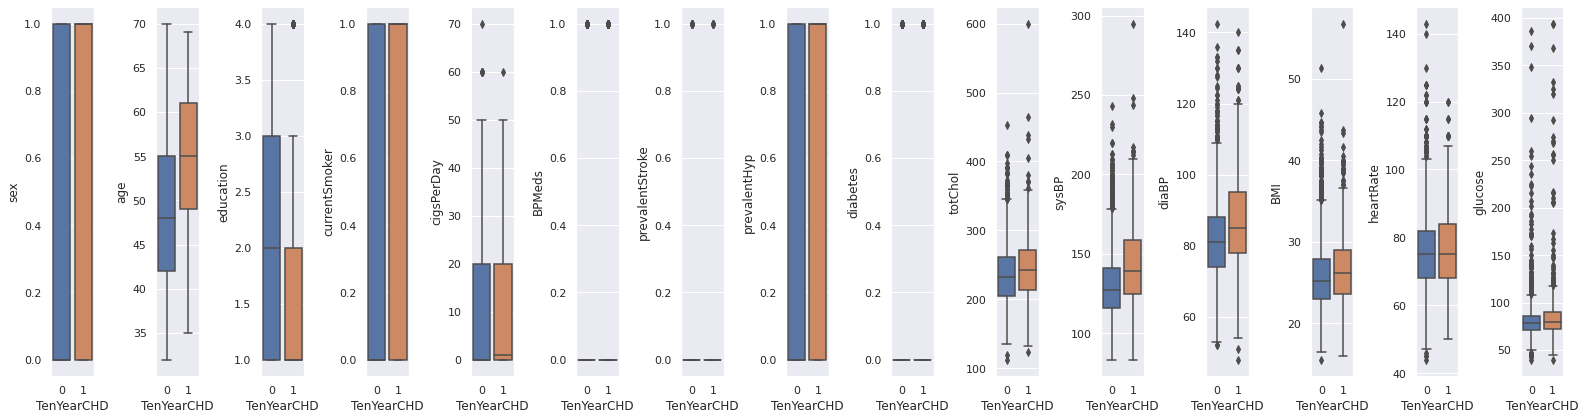

In [19]:
features = df.columns.drop('TenYearCHD')
ncols = len(features)
fig, axes = plt.subplots(1,ncols)
sns.set(rc={'figure.figsize':(22,6)})

for feature, ax in zip(features, axes.flatten()):
    sns.boxplot(y=feature, x= "TenYearCHD", data=df, orient='v', ax=ax)
    
plt.tight_layout()

- All the independent variables are compared with the TenYearCHD to check the outliers. 
- Variable of total cholesterol, systolic blood pressure, diatolic blood pressure, BMI, heart rate, annd glucose is having extreme outliers.

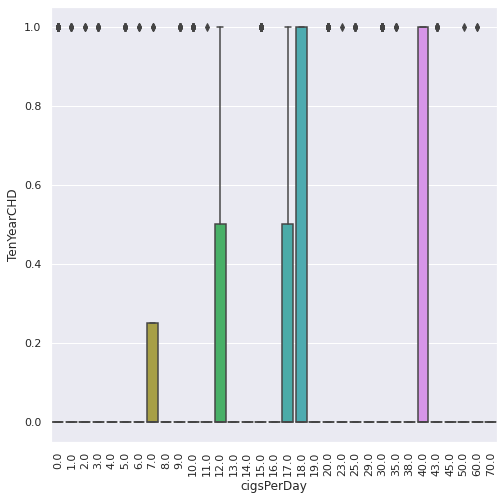

In [7]:
sns.set(rc={'figure.figsize':(8,8)})
g = sns.boxplot(x = "cigsPerDay", y = "TenYearCHD",data=df )
g.set_xticklabels(g.get_xticklabels(), rotation=90);

# To Check Correlation

In [8]:
corr = df.corr()

In [9]:
corr

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


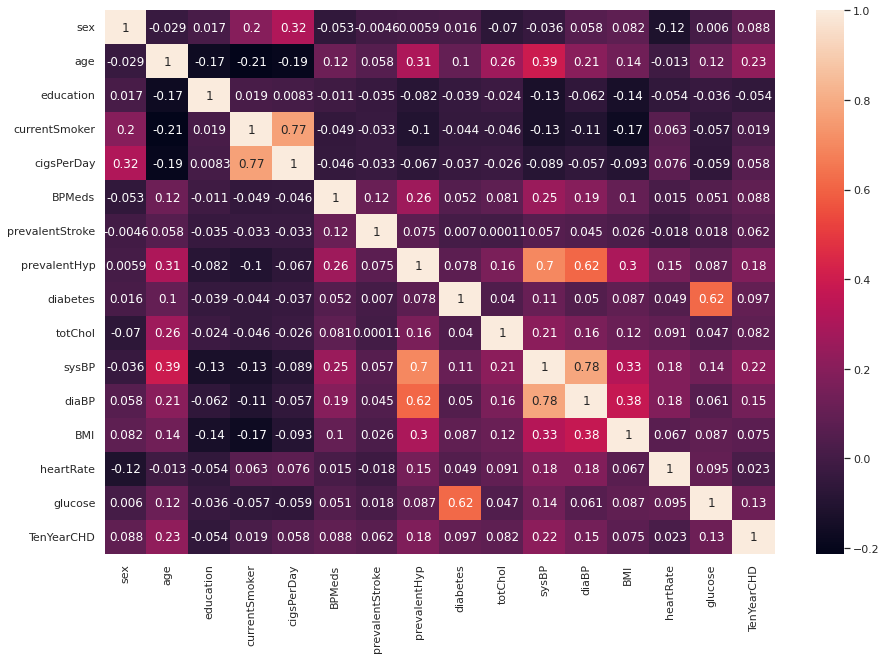

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr, annot = True) # Annotation

- From the correleation result, the glucose level and BMI has the most direct impact on whether a person affected by diabetes.

# To Check The Relationship Of Two Variable

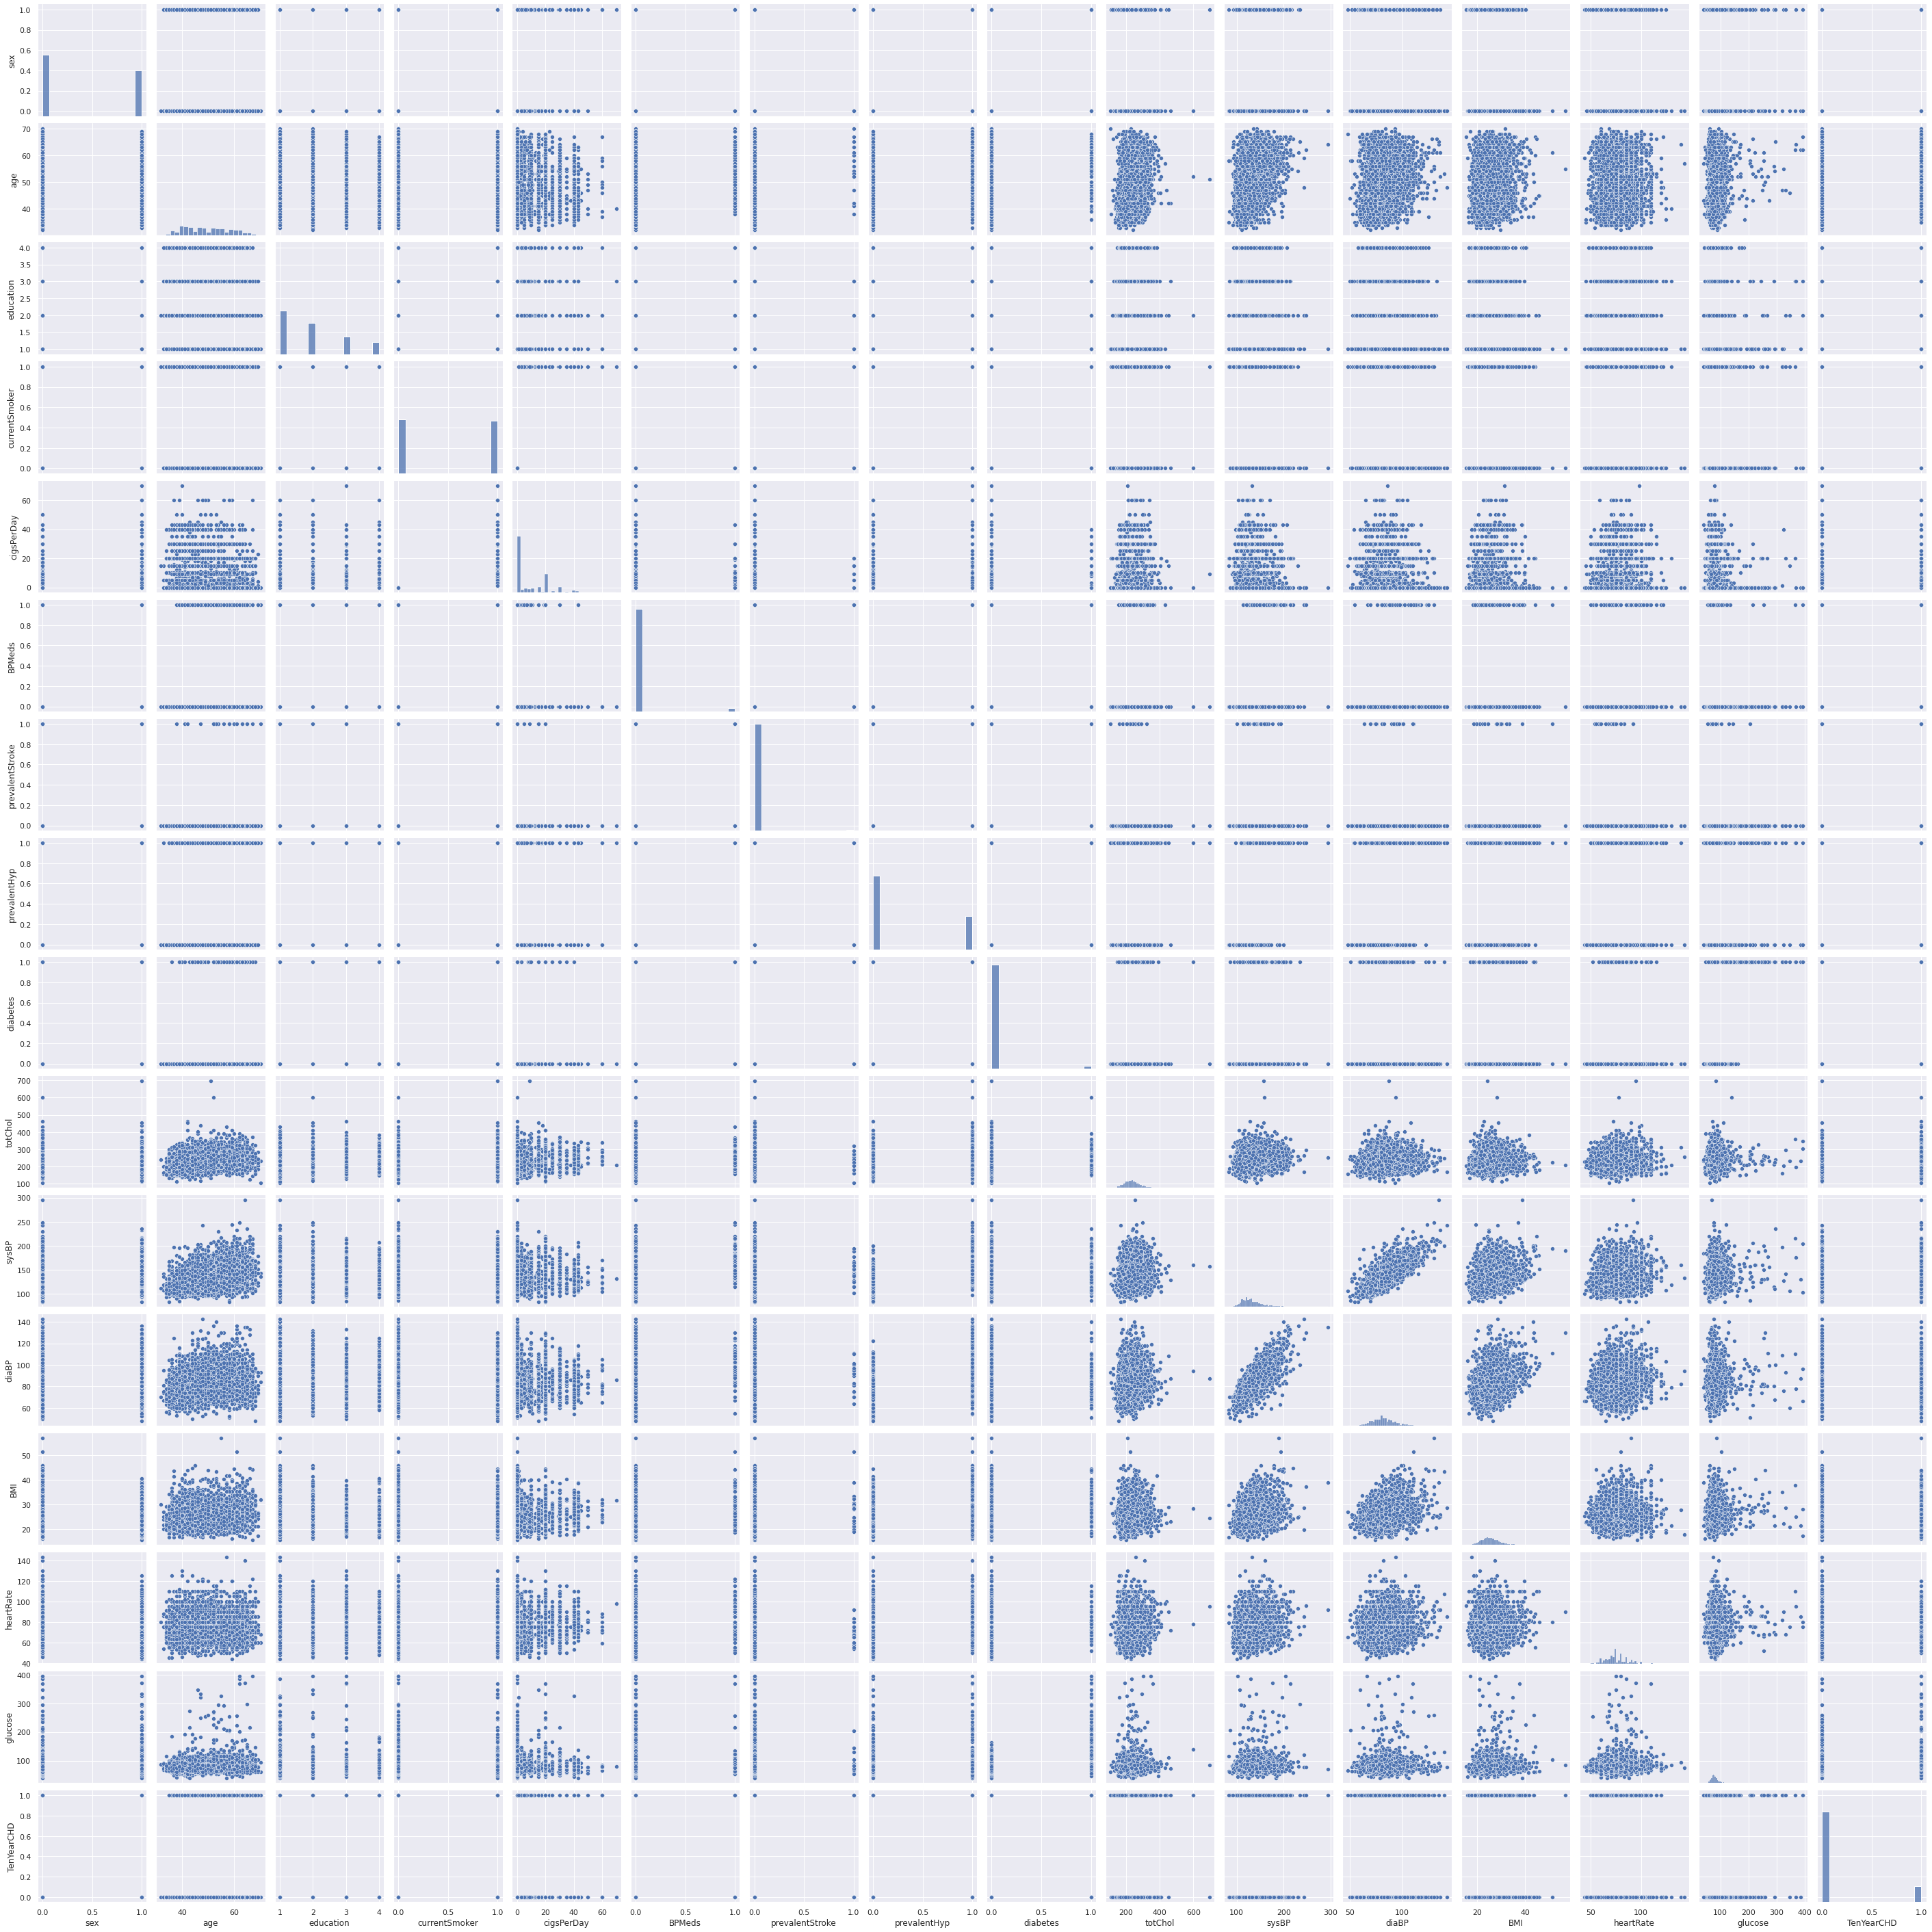

In [11]:
sns.pairplot(df)

- It seems that most variable are unique result and not direclty proportional to another variable. 

#Decision Tree on the Framingham dataset 

In [12]:
df = df.dropna()  # Drop all the missing data 

In [13]:
train_data = df.drop('TenYearCHD', axis = 1)
train_labels = df['TenYearCHD']

In [14]:
from sklearn import tree 
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3)

In [16]:
import graphviz 
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No','Yes'], filled = True, rounded = True)

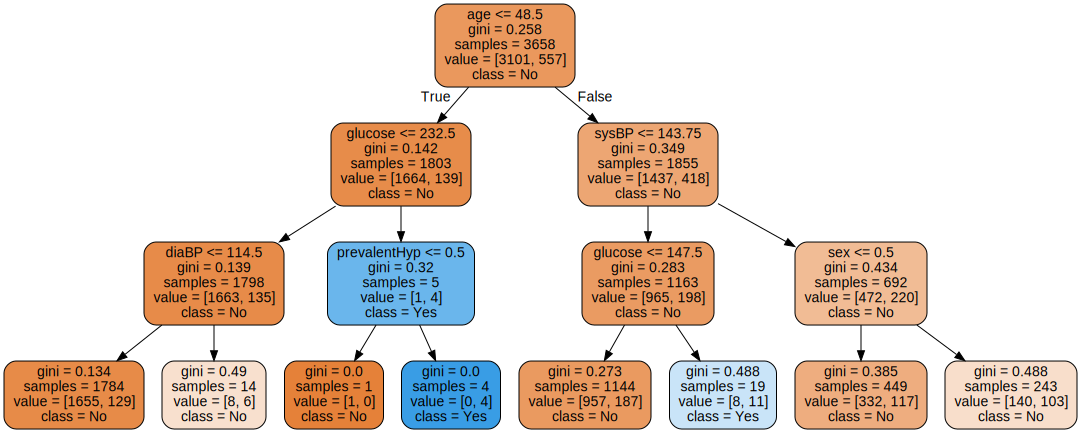

In [17]:
graph = graphviz.Source(dot_data)
graph

- Trying to change the tree max_depth
- The max_depth represent the length of the longest path from the tree root to a leaf

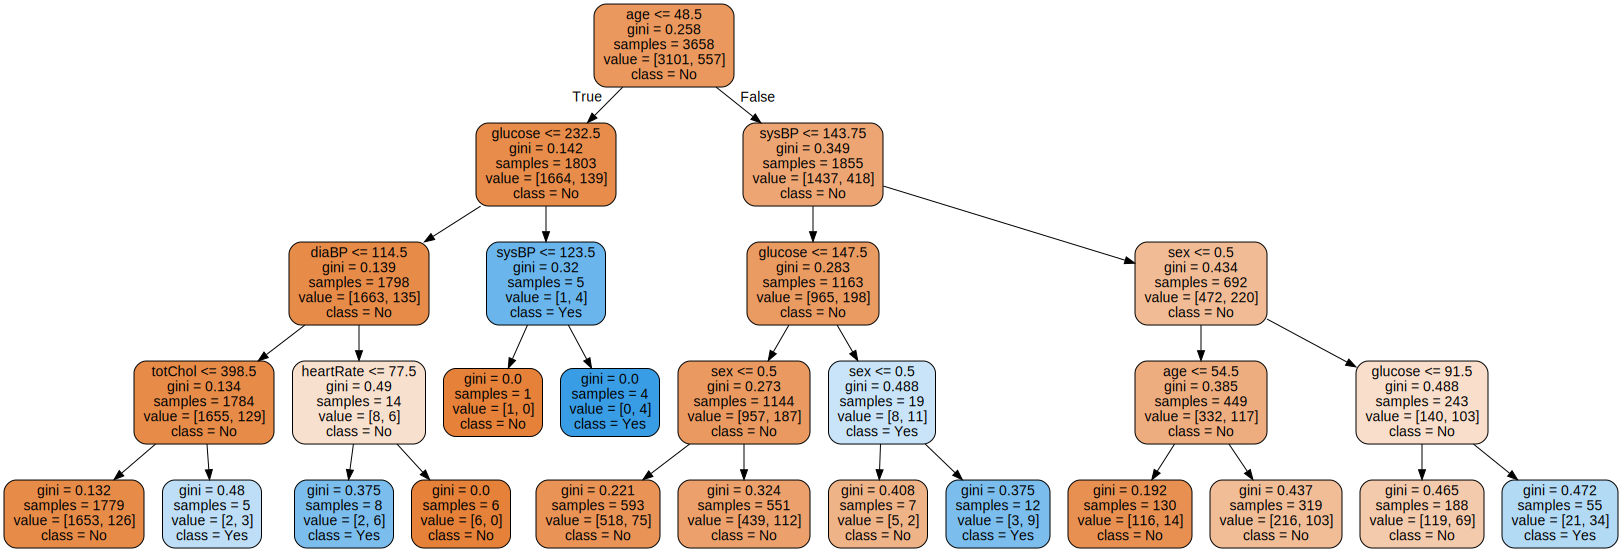

In [25]:
df = df.dropna()  # Drop all the missing data 
train_data = df.drop('TenYearCHD', axis = 1)
train_labels = df['TenYearCHD']
from sklearn import tree 
model = tree.DecisionTreeClassifier(max_depth = 4)
model.fit(train_data, train_labels)
import graphviz 
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No','Yes'], filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph

- From the decision tree, it seems that the possibility or risk of getting the Coronary Heart Disease is really low. 
- People with age less than 48.5, glucose level higher than 232.5 and systolic blood pressure level higher than 123.5 is having a higher risk to be affected. 